# **Let us analyse data scraped from twitter to gauge the political scenario in India**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **The tweet database was taken from:**
 https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [ ]:

df = pd.read_csv("Twitter_Data.csv")
df.head(5)

#Output the first five rows

print(df['category'].unique()) # Get all the diff values, to see if things have been mapped correctly

[-1.  0.  1. nan]


<Axes: xlabel='category'>

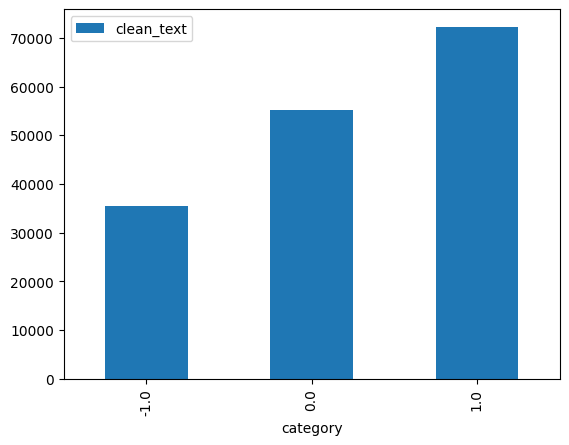

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [ ]:
category_mapping = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive', float('nan') : 'Unknown'} # The nan part is necessary because there are some nan present
df['category'] = df['category'].map(category_mapping)
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


# **Let's take a look at the buzzwords of each category via a Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#write code to generate the worldcloud

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Filter the DataFrame for the specified category
    filtered_df = df[df['category'] == category]

    # Combine all the text in the filtered DataFrame
    text = ' '.join(filtered_df['clean_text'].apply(str))  #.apply(str) is necessary because some have float in the neutral particularly.

    # Generate the Word Cloud
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=STOPWORDS,
                          min_font_size=10).generate(text)

    # Display the Word Cloud
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

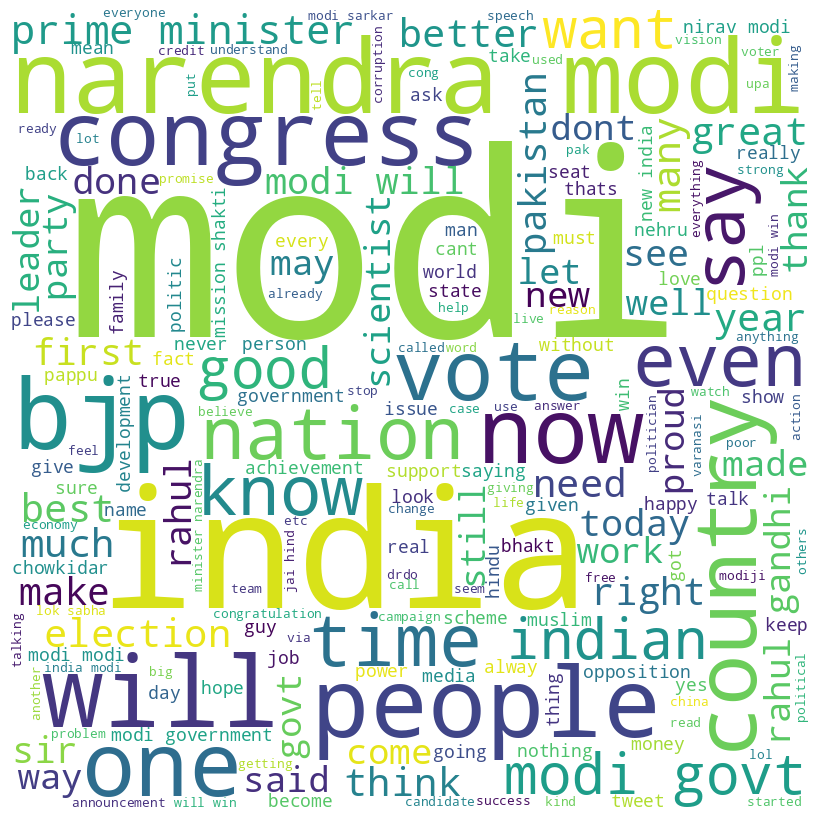

In [ ]:
#Generate Positive tweet words cloud
wordcount_gen(df, 'Positive')


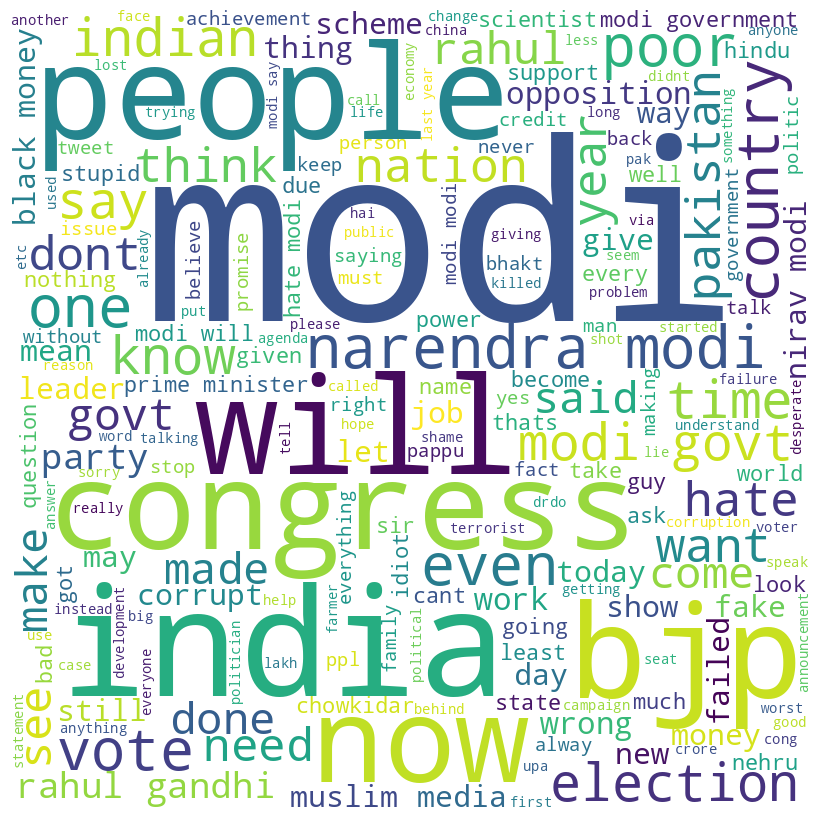

In [ ]:
#Generate Negative tweet words cloud
wordcount_gen(df, 'Negative')


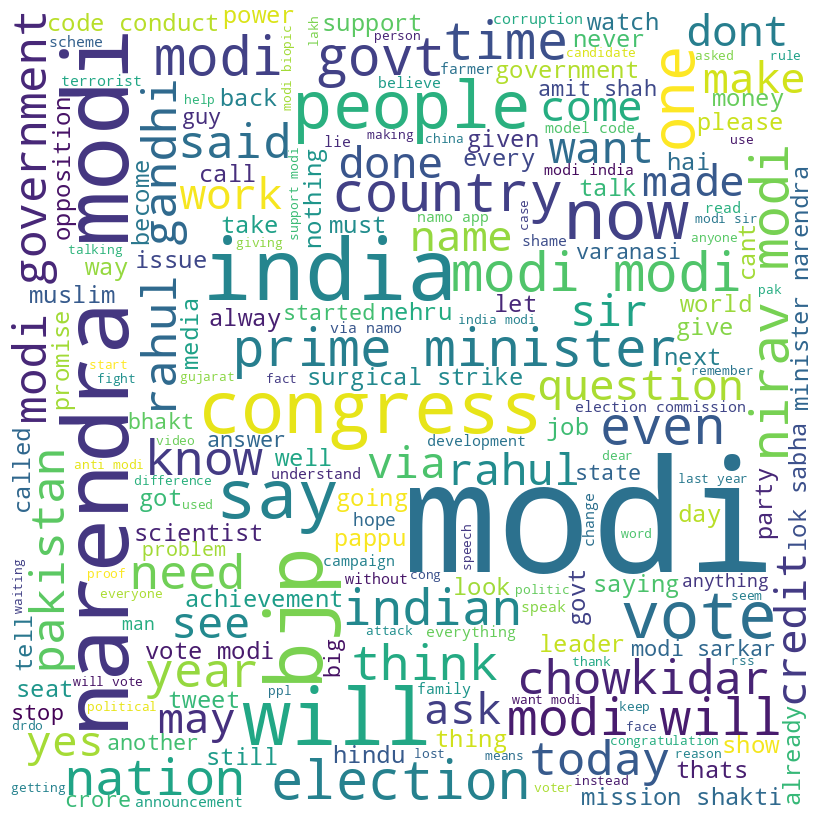

In [ ]:
#Generate Neutral tweet words cloud
wordcount_gen(df, 'Neutral')


# **Cleaning the tweets using RegEx and NLTK**

In [ ]:
 #fill code to return the cleaned tweet using RegEx and NLTK

import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')


    # Initialize NLTK components
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of cleaned words '''
    # Remove special characters, URLs, and mentions using RegEx
    cleaned_tweet = re.sub(r"http\S+|www\S+|@\w+", '', tweet)
    cleaned_tweet = re.sub(r'[^A-Za-z0-9]+', ' ', cleaned_tweet)

    # Tokenize the cleaned tweet
    words = word_tokenize(cleaned_tweet.lower())

    # Remove stopwords and apply stemming
    cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]

    return set(cleaned_words)

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> {'modi', 'promis', 'begin', 'reform', 'exit', 'psu', 'templ', 'year', 'take', 'busi', 'get', 'expect', 'govern', 'difficult', 'state', 'minimum', 'job', 'maximum', 'justic'}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Apply data processing to each tweet
from sklearn.preprocessing import LabelEncoder

# Encode target labels using scikit learn
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode target labels using scikit-learn
df['encoded_category'] = label_encoder.fit_transform(df['category'])

# Display the first few rows to verify the encoding
print(df[['category', 'encoded_category']].head())

df



   category  encoded_category
0  Negative                 0
1   Neutral                 1
2  Positive                 2
3  Positive                 2
4  Positive                 2


,clean_text,category,encoded_category
0,when modi promised “minimum government maximum...,Negative,0
1,talk all the nonsense and continue all the dra...,Neutral,1
2,what did just say vote for modi welcome bjp t...,Positive,2
3,asking his supporters prefix chowkidar their n...,Positive,2
4,answer who among these the most powerful world...,Positive,2
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative,0
162976,dear rss terrorist payal gawar what about modi...,Negative,0
162977,did you cover her interaction forum where she ...,Neutral,1
162978,there big project came into india modi dream p...,Neutral,1


In [ ]:
#train test splitting using scikit learn
from sklearn.model_selection import train_test_split
y = pd.get_dummies(df['category'])
# Handle missing values in 'clean_text' column


# FILL IN THE nan values to be able to vectorize later...
df['clean_text'].fillna("",inplace = True)


X_train, X_test, y_train, y_test =  train_test_split(df.iloc[:,:-2],y)#fill code


## Here y has 4 columns!! because we've used get_dummies...
y

,Negative,Neutral,Positive,Unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
162975,1,0,0,0
162976,1,0,0,0
162977,0,1,0,0
162978,0,1,0,0


#**Train Test Split for training the Regression model**

In [ ]:

#Transform the training and testing data using countvectorizer


from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train['clean_text'])

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test['clean_text'])

# Display the shape of the transformed data
print("X_train_transformed shape:", X_train_transformed.shape)
print("X_test_transformed shape:", X_test_transformed.shape)
X_train_transformed




X_train_transformed shape: (122235, 89586)
X_test_transformed shape: (40745, 89586)


<122235x89586 sparse matrix of type '<class 'numpy.int64'>'
	with 2230526 stored elements in Compressed Sparse Row format>

In [ ]:
#train multivariate logistic regression on the data using scikit learn


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)

# Convert one-hot encoded labels back to categorical labels
y_train_encoded = y_train.idxmax(axis=1)
y_test_encoded = y_test.idxmax(axis=1)

# Fit the model to the training data
model.fit(X_train_transformed, y_train_encoded)

# Predict using the trained model on the testing data
y_pred_encoded = model.predict(X_test_transformed)


In [ ]:
#predict using your model on the testing dataset

# Use the trained model to make predictions on the testing data
y_pred_encoded = model.predict(X_test_transformed)

# Display the predicted labels
print("Predicted labels:", y_pred_encoded)

Predicted labels: ['Negative' 'Neutral' 'Neutral' ... 'Negative' 'Positive' 'Negative']


# **Analysing the Results**

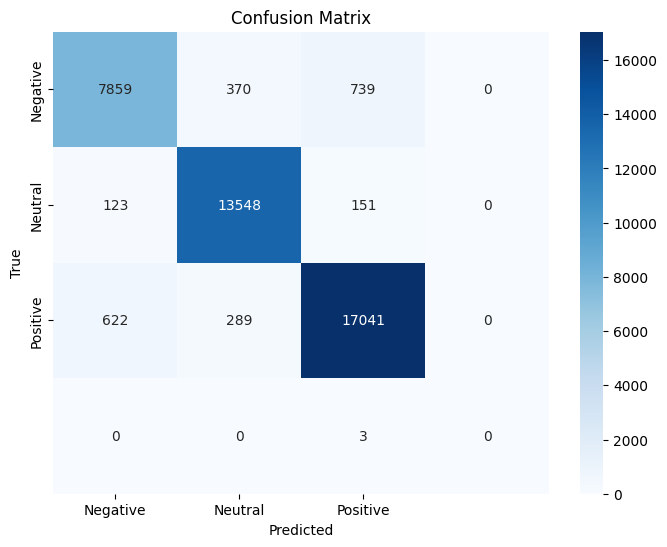

In [ ]:
#Calculate and plot the Confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))

target_names = ["Negative", "Neutral", "Positive"]


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#calculate the precision , recall and accuracy using scikit learn

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Display the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9431941162111825
Recall: 0.9436249846606946
Accuracy: 0.9436249846606946
